Link

In [531]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Perceptron


### Basic Perceptron



![alt text](data/Single-Perceptron.png)

In a perceptron, we have n binary inputs (usually given as a vector) and exactly the equal number of weights vectors.   
We multiply these together and sum them up. before calling the activation function (Step , Sigmoid etc)

$z = \sum_{i=1}^n W_ix_i$ = $\sum_{i=1}^n W^Tx$  
There is another value, called the bias, is usually a constant factor. 

$z = \sum_{i=1}^n W_ix_i$ +b = $\sum_{i=1}^n W^Tx$ + b

For mathematical convenience, we can actually incorporate it into our weight vector as $W_{0}$
and set for all of our inputs $x_{0}$ = +1.  

After taking the weighted sum, we apply an activation function **$\sigma$ to this and produce an activation result.   
The activation function for perceptrons is sometimes called a step function because, if we were to plot it, it would look like a steps.





  \begin{equation}
   \sigma_n = 
  \begin{cases}
     1 & \text{q >= 0}\\
     0 & \text{q < 0}
  \end{cases}
  \end{equation}


Same as saying if the input is greater than or equal to 0, then we produce an output of 1.
Otherwise, we produce an output of 0. This is the mathematical model for a single neuron, This is the basic and fundamental unit for a neural networks


$a = \sigma$ ($W^Tx$)


-- If the perceptron **fires** when it shouldn't have, supress it.   
- If the perceptron doesn't fire when it should have, excite it.  

How do we supress or excite? By changing weight vector (and bias)!   
The weight vector is a parameter to the perceptron: we iterate over it until we can correctly classify each of our inputs.   
Based on this requirement write an update rule for our weight
vector so that we can appropriately change it:  

$W \leftarrow$ W + $\Delta$W  

We have to determine a good $\Delta$W that obtaines the result what we expect.  
First, we can define the error as the difference between the desired output d and the predicted output expected y.

$e$ = $d$ - $y$  

- $e$ error
- $d$ desired output (actuals / labels) 
- $y$ predicted output 

When $d$ and $y$ are the same (both are 0 or both are 1), result = $0$  
When they are different, (0 and 1 or 1 and 0), result can be 1 or -1.  

We multiply error $e$ with the input to tell our perceptron to change our
weight vector in proportion to our input

$W \leftarrow$ W + $\eta$ $.$ $e$ $.$ $x$  

When the error is 0, i.e., the output is what we expect, then we don't change the weight vector at all.  
When the error is nonzero, we update the weight vector accordingly  

This is a hyperparameter $\eta$ that is called the **learning rate**.  
It is just a scaling factor that determines how large the weight vector updates should be.   
This is a hyperparameter because it is not learned by the perceptron but we tune this parameter.  

We need to keep iterating through our training data until tje desired result;  
One epoch is when our perceptron has seen all of the training
data once. Usually, we run our learning algorithm for multiple epochs

$Fit$

Create a function, given inputs and desired outputs,  
- Run the perceptron learning algorithm.   
- Keep updating the weights for a number of epochs, and iterate through
the entire training set.  
- Insert the bias into the input when performing the weight update.  
- Create prediction, compute error, and perform update rule

In [0]:
import numpy as np

class Perceptron:
  def __init__(self,input_size ,weights = None, learn_rate=1 , epoch=10 ):
    # self.weights = np.ones(input_size + 1)
    if weights == None:
      self.weights = np.random.random((input_size + 1))
    else:
      self.weights = np.array(weights)
    self.epoch = epoch
    self.learn_rate = learn_rate



  def activation_fn(self, x):
    return 0 if x <= 0 else 1

# function to run an input through the perceptron and return an output.
# called the prediction. 
# We add the bias into the input vector.  x = np.insert(x,0,1)
# compute the inner product and apply the activation function.

  def predict(self,input_data):
    input_data = np.insert(input_data ,0 ,1)
    weighted_input = self.weights.T.dot(input_data)
    weighted_sum   = weighted_input.sum()
    activation     = self.activation_fn(weighted_sum)
    # print(input_data,weighted_input,weighted_sum,activation)
    return activation

# Create a function to keep applying this update rule
# until our perceptron can correctly classify all of our input X to lables d

  def fit(self,X_train ,y_actual):
    for _ in range(self.epoch):
      for i in range(y_actual.shape[0]):
        y_pred = self.predict(X_train[i])
        error = y_actual[i] - y_pred
        # print(error)
        self.weights = self.weights + self.learn_rate * error * np.insert(X_train[i] ,0,1)
        # print(self.weights)
        


In [0]:
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    
    
d = np.array([0, 0, 0, 1])



[-3, 2, 1]. 
This means that the bias is -3 and 
The weights are 2 and 1 for x1 and x2 respectively.
- -3+ 0x2 + 0x1 = -3  for first row 0,0  When applying our activation function, we get 0, which is exactly 0 AND 0! 
- -3+ 1x2+ 1x1 = 0    for last  row 1,1  When applying our activation function, we get 1, which is exactly 1 AND 1! 

There exist an infinite number of weight vectors. Which weight vector
we get depends on how we initialize the weight vector.

In [540]:
perceptron = Perceptron(2)
perceptron.fit(X, d)
print('Weights',perceptron.weights)

# [-3, 2, 1]. 
# This means that the bias is -3 and 
# The weights are 2 and 1 for x1 and x2 respectively.
# -3 + 0*2+ 0*1 = -3   for first row 0,0  When applying our activation function, we get 0, which is exactly 0 AND 0! 
# -3 + 1*2+ 1*1 =  0   for last  row 1,1  When applying our activation function, we get 1, which is exactly 1 AND 1! 




Weights [-3.18976039  2.81209617  1.35642125]


In [541]:
from prettytable import PrettyTable
t = PrettyTable(['X','Actuals','Prediction'])


for i in range(d.shape[0]):
  y = perceptron.predict(X[i])
  # print(X[i],d[i],y,perceptron.error)
  t.add_row([X[i],d[i],y])

print(t)

+-------+---------+------------+
|   X   | Actuals | Prediction |
+-------+---------+------------+
| [0 0] |    0    |     0      |
| [0 1] |    0    |     0      |
| [1 0] |    0    |     0      |
| [1 1] |    1    |     1      |
+-------+---------+------------+


Perceptron with Sigmoid Activation Function

In [0]:
import numpy as np

class PerceptronSigmoid:
  def __init__(self,input_size ,weights = None, learn_rate=1 , epoch=10 ):
    # self.weights = np.ones(input_size + 1)
    if weights == None:
      self.weights = np.random.random((input_size + 1))
    else:
      self.weights = np.array(weights)
    self.epoch = epoch
    self.learn_rate = learn_rate

  def sigmoid_activation_fn(self, x):  # Sigmoid Activation Fn
    return 1 / (1 + np.exp(-x))


  def predict(self,input_data):
    input_data = np.insert(input_data ,0 ,1)
    weighted_input = self.weights.T.dot(input_data)
    weighted_sum   = weighted_input.sum()
    activation     = self.sigmoid_activation_fn(weighted_sum)
    # print(input_data,weighted_input,weighted_sum,activation)
    return activation


  def fit(self,X_train ,y_actual):
    for _ in range(self.epoch):
      for i in range(y_actual.shape[0]):
        y_pred = self.predict(X_train[i])
        error = y_actual[i] - y_pred
        # print(error)
        self.weights = self.weights + self.learn_rate * error * np.insert(X_train[i] ,0,1)
        # print(self.weights)


, 0, 1)


In [576]:
X_sig = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

y_sig = np.array([0, 0, 0, 1])

perceptron1 = PerceptronSigmoid(input_size=2,epoch=10 ,weights=[1,1,1],learn_rate=2)

perceptron1.fit(X_sig, y_sig)
print(perceptron1.weights)

for i in range(d.shape[0]):
  y = perceptron1.predict(X_sig[i])
  print(X[i],round(y,1))

[-5.6538344   4.33975107  3.90181266]
0 0.0
1 0.1
2 0.2
3 0.9


**Decision Boundary**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)

oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)


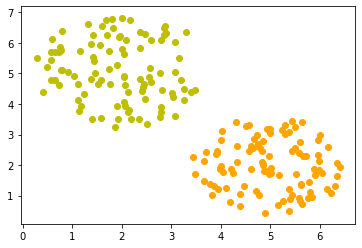

In [543]:
import time
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle


X = np.arange(0, 10)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")


plt.show()

In [0]:
fruits = list(zip(oranges_x, oranges_y, repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, lemons_y, repeat(1, len(oranges_x))))
shuffle(fruits)

X_t_comprehension = [xpoint[0] for xpoint in fruits]
y_t_comprehension = [xpoint[1] for xpoint in fruits]
d_t_comprehension = [xpoint[2] for xpoint in fruits]

X_train_list = list(zip(X_t_comprehension,y_t_comprehension))

X_train_np = np.array(X_train_list)
y_train_np = np.array(d_t_comprehension)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_np, y_train_np, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42 # garantees same output for every run
                      )

In [560]:
p_c = Perceptron(2,learn_rate=0.5 ,epoch=10)

p_c.fit(X_train, y_train)

print('Weights',p_c.weights)



Weights [-0.46054799 -3.41297872  3.20823939]


We multiplied the input values with the weights and got negative and positive values.   
Examine what we get, if we calculation results in 0:  

$x_1w_1$ + $x_2w_2$ = 0

We can change this equation into  

$x_2$  = $\frac{w_1}{w_2}x_1$


When we look at the general form of a straight line $y = mx+b$ 

We can easily see that our equation corresponds to the definition of a line and the  
slope (aka gradient) $m$ =  $-\frac{w_1}{w_2}$   
and $b$ intercept is equal to 0.

This is the straight line separating the oranges and lemons, which is called the **decision boundary.**

[-0.46054799 -3.41297872  3.20823939]


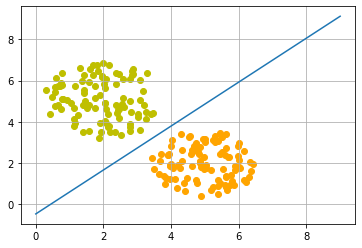

slope 1.063816725309497


In [561]:
import time
import matplotlib.pyplot as plt
# slope = 0.1

bias = p_c.weights[0]
w1 = p_c.weights[1]
w2 = p_c.weights[2]
m = -w1 / w2


X = np.arange(0, 10)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

ax.plot(X, (m * X)+ bias )
# ax.plot(X, (m * X) )

print(p_c.weights)

ax.grid()
plt.show()

print('slope' , m)



Evaluate Train Data

In [562]:
from collections import Counter

evaluation = Counter()
for i in range(y_train.shape[0]):
  y = p_c.predict(X_train[i])
  # print(p_c.weights)
  # print(X_train[i],y_train[i],y,p_c.error)
  if  y == y_train[i]:
    evaluation["correct"] += 1
  else:
    evaluation["wrong"] += 1

evaluation

Counter({'correct': 160})

Evaluate Test Data

In [563]:
from collections import Counter

evaluation = Counter()
for i in range(y_test.shape[0]):
  y = p_c.predict(X_test[i])
  # print(p_c.weights)
  # print(X_test[i],y_test[i],y,p_c.error)
  if y_test[i] == y:
    evaluation["correct"] += 1
  else:
    evaluation["wrong"] += 1

evaluation

Counter({'correct': 40})

## Use Sigmoid Activation 

In [579]:
p_sig = PerceptronSigmoid(2,learn_rate=0.2)

p_sig.fit(X_train, y_train)

print('Weights',p_sig.weights)

Weights [-0.03024454 -3.19489336  3.39982318]


[-0.03024454 -3.19489336  3.39982318]


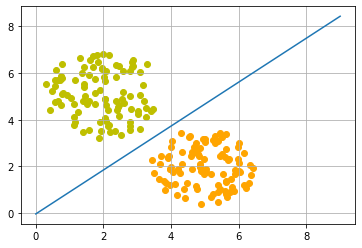

slope 0.9397233889687291


In [580]:
import time
import matplotlib.pyplot as plt
# slope = 0.1

bias = p_sig.weights[0]
w1 = p_sig.weights[1]
w2 = p_sig.weights[2]
m = -w1 / w2


X = np.arange(0, 10)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

ax.plot(X, (m * X)+ bias )

print(p_sig.weights)

ax.grid()
plt.show()

print('slope' ,m)